# Attempt to use Linear Regression to Determine the Inverse of a 3x3 matrix

This notebook is basic for running initial tests to learn about how feasible it is to determine the inverse of a 3x3 matrix by linear regression. We will attempt to perform linear regression for each cell of the inverse matrix, we will try to predict the value of each matrix inverse cell. We will determine the mean of rsquareds - for the linear regression of all cells of the inverse matrix - as a metric for how good a model is.

We will use Ordinary Least Squares linear regression

Test 1: linear regression between matrix elements and inverse matrix elements

Test 2: linear regression with test 1 and all possible combinations of one matrix element multiplied by every other 
        matrix element

Test 3: linear regression with test 2 and the square of each matrix element

Test 4: linear regression with test 1 and all possible combinations of one matrix element squared and multiplied by 
        every other matrix element and the cube of each matrix element

Note how Test 4 does not even use the parts of test 3 that included all possible combinations of one matrix element multiplied by every other matrix element - these are the tests I am reporting to demonstrate the importance of the aspect of test 4

Initially I had more tests to determine what tests had the best terms for a fit
I have condensed the list of tests

## Table of Contents
[1. Variable Setup](#Step-1:-Variable-setup) 

[2. Notebook Setup](#Step-2:-Notebook-setup) <br>

[3. Matrix and Inverse Matrix EDA/Analysis](#Step-3:-Matrix-and-Inverse-Matrix-EDA/Analysis) <br>

[4. Test 1 Single Cell of Inverse Matrix And Linear Regression Analysis](#Step-4:-Single-Cell-Test-1-and-Linear-Regression-Analysis) <br>

[5. Test 1](#Step-5:-Test-1) <br>

[6. Test 2](#Step-6:-Test-2) <br>

[7. Test 3](#Step-7:-Test-3) <br>

[8. Test 4](#Step-8:-Test-4) <br>

[9. Conclusion](#Step-9:-Conclusion)

## Step 1: Variable setup
There are variables below to modify the parameters for the tests

random seed: how the engine generates the random set of matrices, each random seed will generate a different set of random matrices

minCellValue: the minimum value of each matrix element

maxCellValue: the maximum value of each matrix element

numMatricesToGenerate: the number of matrices to use, more matrices more reliable results, but longer execution time

integersOnly: to use integers only in the tests

digitsToRoundResults: for the printouts of the results, how many digits to show for the rounding of floating point numbers

cellToPerformSingleCellLinearRegressionAnalysisOn: For Test 1 We will show the parameters for Linear regresion, specify cell

In [390]:
randomSeed = 13099

minCellValue = 0

maxCellValue = 6

NumMatricesToGenerate = 3501

integersOnly = True

digitsToRoundResults = 4 

cellToPerformSingleCellLinearRegressionAnalysisOn = '00'

## Step 2: Notebook setup

In [391]:
#import libraries/setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
np.random.seed(randomSeed)

In [392]:
#variables to be used throughout this notebook
matrixSize = 3
listVar = list(range(matrixSize))
inverseRangeMin = minCellValue - (maxCellValue-minCellValue)*100.0
inverseRangeMax = maxCellValue + (maxCellValue-minCellValue)*100.0

In [393]:
#function to be used
def dropCols(dflm):
    dflm.drop('inverse00', axis=1, inplace=True)
    dflm.drop('inverse01', axis=1, inplace=True)
    dflm.drop('inverse02', axis=1, inplace=True)
    dflm.drop('inverse10', axis=1, inplace=True)
    dflm.drop('inverse11', axis=1, inplace=True)
    dflm.drop('inverse12', axis=1, inplace=True)
    dflm.drop('inverse20', axis=1, inplace=True)
    dflm.drop('inverse21', axis=1, inplace=True)
    dflm.drop('inverse22', axis=1, inplace=True)
    dflm.drop('original', axis=1, inplace=True)
    dflm.drop('inverse', axis=1, inplace=True)

In [394]:
#generate all matrices and their inverses, not all matrices can be inverted

In [395]:
matList = []
i = 1
while i < NumMatricesToGenerate:
    if integersOnly: 
        matList.append(np.random.randint(minCellValue, maxCellValue+1, (matrixSize, matrixSize))) 
    else:
        matList.append(np.random.uniform(minCellValue, maxCellValue+1, (matrixSize, matrixSize))) 
    i += 1

In [396]:
#Try to invert all the matrices and then print out how many were invertible

In [397]:
invList = []
for x in matList:
    try:
        inverse = np.linalg.inv(x)
        invList.append([x, inverse])
    except np.linalg.LinAlgError:
    # Not invertible. Skip this one.
        pass

In [398]:
print(str(len(invList)) + " matrices were invertible out of " + str(NumMatricesToGenerate) + " matrices")

3363 matrices were invertible out of 3501 matrices


In [399]:
#convert to dataframe
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

In [400]:
#put each element of matrices and inverse to a column in dataframe and check the top 5 and bottom 5 elements of the dataframe
for i in listVar:
    for j in listVar:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in listVar:
    for j in listVar:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)
df

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,original22,inverse00,inverse01,inverse02,inverse10,inverse11,inverse12,inverse20,inverse21,inverse22
0,"[[0, 6, 5], [3, 0, 3], [4, 5, 5]]","[[-0.2631578947368421, -0.08771929824561403, 0...",0,6,5,3,0,3,4,5,5,-0.263158,-8.771930e-02,0.315789,-0.052632,-0.350877,0.263158,2.631579e-01,0.421053,-0.315789
1,"[[5, 2, 6], [6, 3, 0], [2, 4, 4]]","[[0.10000000000000002, 0.13333333333333333, -0...",5,2,6,6,3,0,2,4,4,0.100000,1.333333e-01,-0.150000,-0.200000,0.066667,0.300000,1.500000e-01,-0.133333,0.025000
2,"[[0, 5, 4], [5, 6, 0], [2, 0, 1]]","[[-0.08219178082191778, 0.06849315068493152, 0...",0,5,4,5,6,0,2,0,1,-0.082192,6.849315e-02,0.328767,0.068493,0.109589,-0.273973,1.643836e-01,-0.136986,0.342466
3,"[[5, 0, 6], [4, 4, 2], [0, 0, 2]]","[[0.2, 0.0, -0.6], [-0.2, 0.25, 0.350000000000...",5,0,6,4,4,2,0,0,2,0.200000,0.000000e+00,-0.600000,-0.200000,0.250000,0.350000,0.000000e+00,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,"[[5, 5, 2], [1, 4, 1], [5, 2, 0]]","[[0.09523809523809523, -0.19047619047619052, 0...",5,5,2,1,4,1,5,2,0,0.095238,-1.904762e-01,0.142857,-0.238095,0.476190,0.142857,8.571429e-01,-0.714286,-0.714286
3360,"[[0, 2, 5], [3, 6, 6], [1, 5, 4]]","[[-0.1818181818181818, 0.5151515151515151, -0....",0,2,5,3,6,6,1,5,4,-0.181818,5.151515e-01,-0.545455,-0.181818,-0.151515,0.454545,2.727273e-01,0.060606,-0.181818
3361,"[[5, 3, 2], [4, 4, 4], [6, 4, 1]]","[[0.7500000000000003, -0.3125000000000001, -0....",5,3,2,4,4,4,6,4,1,0.750000,-3.125000e-01,-0.250000,-1.250000,0.437500,0.750000,5.000000e-01,0.125000,-0.500000
3362,"[[5, 3, 6], [6, 6, 6], [1, 1, 2]]","[[0.5000000000000001, 1.850371707708594e-17, -...",5,3,6,6,6,6,1,1,2,0.500000,1.850372e-17,-1.500000,-0.500000,0.333333,0.500000,2.775558e-17,-0.166667,1.000000


## Step 3: Matrix and Inverse Matrix EDA/Analysis

In [401]:
df.describe()

,original00,original01,original02,original10,original11,original12,original20,original21,original22,inverse00,inverse01,inverse02,inverse10,inverse11,inverse12,inverse20,inverse21,inverse22
count,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03
mean,3.028546,3.047874,3.011002,3.021112,3.011597,2.975022,3.062742,3.068391,2.994945,-7.599921e+12,7.768452e+12,-1.207293e+13,1.762156e+13,1.834585e+13,-2.600717e+13,-4.328469e+12,-3.118180e+13,2.382490e+13
std,1.979615,1.955886,1.991400,1.976626,2.006425,1.987910,2.004736,1.970354,1.989481,1.894723e+15,2.030248e+15,9.320455e+14,2.286423e+15,1.210700e+15,2.587131e+15,2.430006e+15,1.616331e+15,2.550739e+15
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.007199e+16,-2.161728e+16,-3.602880e+16,-4.323456e+16,-3.602880e+16,-1.351080e+17,-1.013310e+17,-7.205759e+16,-3.602880e+16
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-2.500000e-01,-2.000000e-01,-2.222222e-01,-2.000000e-01,-2.279221e-01,-2.360681e-01,-2.066229e-01,-2.475490e-01,-2.222222e-01
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000e+00,2.777778e-02,3.700743e-17,4.440892e-17,8.578996e-18,0.000000e+00,1.754386e-02,0.000000e+00,0.000000e+00
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.777778e-01,3.258342e-01,3.000000e-01,3.103448e-01,3.000000e-01,2.941176e-01,3.333333e-01,2.857143e-01,3.000000e-01
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.323456e+16,1.080864e+17,1.801440e+16,1.013310e+17,2.161728e+16,3.602880e+16,6.004800e+16,2.251800e+16,1.351080e+17


In [402]:
#Analysis

<b><font style='color:blue'>The Mean and Standard Deviations for all the cells of the original matrices are fine, However what is going on with the Inverse Cells. This is quite alarming!!!!!!! The min and max values are huge, 10^16</font></b>

In [403]:
#Show the mean and standard deviation values for the inverted matrices - Excluding the matrices that could not be inverted
#Show in printout of its own to highlight these extreme values without having to visualize the other information in the table above

In [404]:
print('the mean of cell 00 is: ' + str(np.round(df['inverse00'].mean())))
print('the mean of cell 01 is: ' + str(np.round(df['inverse01'].mean())))
print('the mean of cell 02 is: ' + str(np.round(df['inverse02'].mean())))
print('the mean of cell 10 is: ' + str(np.round(df['inverse10'].mean())))
print('the mean of cell 11 is: ' + str(np.round(df['inverse11'].mean())))
print('the mean of cell 12 is: ' + str(np.round(df['inverse12'].mean())))
print('the mean of cell 20 is: ' + str(np.round(df['inverse20'].mean())))
print('the mean of cell 21 is: ' + str(np.round(df['inverse21'].mean())))
print('the mean of cell 22 is: ' + str(np.round(df['inverse22'].mean())))

the mean of cell 00 is: -7599921331813.0
the mean of cell 01 is: 7768452319449.0
the mean of cell 02 is: -12072926908196.0
the mean of cell 10 is: 17621562073466.0
the mean of cell 11 is: 18345853691219.0
the mean of cell 12 is: -26007172123711.0
the mean of cell 20 is: -4328469264367.0
the mean of cell 21 is: -31181800922956.0
the mean of cell 22 is: 23824900340087.0


In [405]:
print('the standard deviation of cell 00 values is: ' + str(np.round(df['inverse00'].std(),digitsToRoundResults)))
print('the standard deviation of cell 01 values is: ' + str(np.round(df['inverse01'].std(),digitsToRoundResults)))
print('the standard deviation of cell 02 values is: ' + str(np.round(df['inverse02'].std(),digitsToRoundResults)))
print('the standard deviation of cell 10 values is: ' + str(np.round(df['inverse10'].std(),digitsToRoundResults)))
print('the standard deviation of cell 11 values is: ' + str(np.round(df['inverse11'].std(),digitsToRoundResults)))
print('the standard deviation of cell 12 values is: ' + str(np.round(df['inverse12'].std(),digitsToRoundResults)))
print('the standard deviation of cell 20 values is: ' + str(np.round(df['inverse20'].std(),digitsToRoundResults)))
print('the standard deviation of cell 21 values is: ' + str(np.round(df['inverse21'].std(),digitsToRoundResults)))
print('the standard deviation of cell 22 values is: ' + str(np.round(df['inverse22'].std(),digitsToRoundResults)))

the standard deviation of cell 00 values is: 1894722750598360.2
the standard deviation of cell 01 values is: 2030247701684593.0
the standard deviation of cell 02 values is: 932045454255134.1
the standard deviation of cell 10 values is: 2286423172190973.5
the standard deviation of cell 11 values is: 1210699793733533.8
the standard deviation of cell 12 values is: 2587131493153592.0
the standard deviation of cell 20 values is: 2430005541365658.0
the standard deviation of cell 21 values is: 1616331362343047.5
the standard deviation of cell 22 values is: 2550738909133748.5


In [406]:
print('the max value of cell 00 values is: ' + str(min(df['inverse00'])))
print('the min value of cell 00 values is: ' + str(max(df['inverse00'])))
print('the max value of cell 01 values is: ' + str(min(df['inverse01'])))
print('the min value of cell 01 values is: ' + str(max(df['inverse01'])))
print('the max value of cell 02 values is: ' + str(min(df['inverse02'])))
print('the min value of cell 02 values is: ' + str(max(df['inverse02'])))
print('the max value of cell 10 values is: ' + str(min(df['inverse10'])))
print('the min value of cell 10 values is: ' + str(max(df['inverse10'])))
print('the max value of cell 11 values is: ' + str(min(df['inverse11'])))
print('the min value of cell 11 values is: ' + str(max(df['inverse11'])))
print('the max value of cell 12 values is: ' + str(min(df['inverse12'])))
print('the min value of cell 12 values is: ' + str(max(df['inverse12'])))
print('the max value of cell 20 values is: ' + str(min(df['inverse20'])))
print('the min value of cell 20 values is: ' + str(max(df['inverse20'])))
print('the max value of cell 21 values is: ' + str(min(df['inverse21'])))
print('the min value of cell 21 values is: ' + str(max(df['inverse21'])))
print('the max value of cell 22 values is: ' + str(min(df['inverse22'])))
print('the min value of cell 22 values is: ' + str(max(df['inverse22'])))

the max value of cell 00 values is: -9.007199254740992e+16
the min value of cell 00 values is: 4.323455642275676e+16
the max value of cell 01 values is: -2.161727821137838e+16
the min value of cell 01 values is: 1.080863910568919e+17
the max value of cell 02 values is: -3.602879701896397e+16
the min value of cell 02 values is: 1.8014398509481984e+16
the max value of cell 10 values is: -4.323455642275676e+16
the min value of cell 10 values is: 1.0133099161583584e+17
the max value of cell 11 values is: -3.602879701896397e+16
the min value of cell 11 values is: 2.161727821137838e+16
the max value of cell 12 values is: -1.3510798882111446e+17
the min value of cell 12 values is: 3.602879701896397e+16
the max value of cell 20 values is: -1.0133099161583584e+17
the min value of cell 20 values is: 6.0047995031606616e+16
the max value of cell 21 values is: -7.205759403792794e+16
the min value of cell 21 values is: 2.2517998136852464e+16
the max value of cell 22 values is: -3.602879701896397e+16

In [407]:
#Analysis

<b><font style='color:blue'>OK well min, max values are extreme! the means and standard deviations are extreme! this will clearly throw off the linear regresions even if there very few values with such high values. This has been tested accross many random seeds. The next notebook for this series I will check in an automated manner to verify this happens for every randomly generated set</font></b>

<b><font style='color:blue'>These inverse matrices with high cell values need to be removed from the test data</font></b>

In [408]:
# Filter MAtrix Generated Data based on this formula (maxCellValue-minCellValue)*1000

In [409]:
df = df.loc[df['inverse00'] > inverseRangeMin]
df = df.loc[df['inverse00'] < inverseRangeMax]
df = df.loc[df['inverse01'] > inverseRangeMin]
df = df.loc[df['inverse01'] < inverseRangeMax]
df = df.loc[df['inverse02'] > inverseRangeMin]
df = df.loc[df['inverse02'] < inverseRangeMax]
df = df.loc[df['inverse10'] > inverseRangeMin]
df = df.loc[df['inverse10'] < inverseRangeMax]
df = df.loc[df['inverse11'] > inverseRangeMin]
df = df.loc[df['inverse11'] < inverseRangeMax]
df = df.loc[df['inverse12'] > inverseRangeMin]
df = df.loc[df['inverse12'] < inverseRangeMax]
df = df.loc[df['inverse20'] > inverseRangeMin]
df = df.loc[df['inverse20'] < inverseRangeMax]
df = df.loc[df['inverse21'] > inverseRangeMin]
df = df.loc[df['inverse21'] < inverseRangeMax]
df = df.loc[df['inverse22'] > inverseRangeMin]
df = df.loc[df['inverse22'] < inverseRangeMax]

In [410]:
print(str(len(invList)) + " matrices were invertible out of " + str(NumMatricesToGenerate) + " matrices"+ ' we are now working with '+ str(df.shape[0]) + ' matrices')
print(str(format(((len(invList)-(df.shape[0]))/len(invList)), "%")) + " of matrices were removed from the dataset")

3363 matrices were invertible out of 3501 matrices we are now working with 3314 matrices
1.457032% of matrices were removed from the dataset


In [411]:
#Analysis

<b><font style='color:blue'>OK well this removal should be fine, removing around 1.5% of the matrices from the set, very justified as values with numbers up to 10^32 (I have seen this in the min max results for different seeds) will destroy a linear regression. Generally this is very close to 1.5% when using different random seeds.</font></b>

In [412]:
#Check the standard deviations and means again

In [413]:
print('the mean of cell 00 is: ' + str(np.round(df['inverse00'].mean(),digitsToRoundResults)))
print('the mean of cell 01 is: ' + str(np.round(df['inverse01'].mean(),digitsToRoundResults)))
print('the mean of cell 02 is: ' + str(np.round(df['inverse02'].mean(),digitsToRoundResults)))
print('the mean of cell 10 is: ' + str(np.round(df['inverse10'].mean(),digitsToRoundResults)))
print('the mean of cell 11 is: ' + str(np.round(df['inverse11'].mean(),digitsToRoundResults)))
print('the mean of cell 12 is: ' + str(np.round(df['inverse12'].mean(),digitsToRoundResults)))
print('the mean of cell 20 is: ' + str(np.round(df['inverse20'].mean(),digitsToRoundResults)))
print('the mean of cell 21 is: ' + str(np.round(df['inverse21'].mean(),digitsToRoundResults)))
print('the mean of cell 22 is: ' + str(np.round(df['inverse22'].mean(),digitsToRoundResults)))

the mean of cell 00 is: -0.0081
the mean of cell 01 is: 0.0775
the mean of cell 02 is: 0.0473
the mean of cell 10 is: 0.063
the mean of cell 11 is: 0.0172
the mean of cell 12 is: -0.0052
the mean of cell 20 is: 0.0307
the mean of cell 21 is: 0.0029
the mean of cell 22 is: 0.0732


In [414]:
print('the standard deviation of cell 00 values is: ' + str(np.round(df['inverse00'].std(),digitsToRoundResults)))
print('the standard deviation of cell 01 values is: ' + str(np.round(df['inverse01'].std(),digitsToRoundResults)))
print('the standard deviation of cell 02 values is: ' + str(np.round(df['inverse02'].std(),digitsToRoundResults)))
print('the standard deviation of cell 10 values is: ' + str(np.round(df['inverse10'].std(),digitsToRoundResults)))
print('the standard deviation of cell 11 values is: ' + str(np.round(df['inverse11'].std(),digitsToRoundResults)))
print('the standard deviation of cell 12 values is: ' + str(np.round(df['inverse12'].std(),digitsToRoundResults)))
print('the standard deviation of cell 20 values is: ' + str(np.round(df['inverse20'].std(),digitsToRoundResults)))
print('the standard deviation of cell 21 values is: ' + str(np.round(df['inverse21'].std(),digitsToRoundResults)))
print('the standard deviation of cell 22 values is: ' + str(np.round(df['inverse22'].std(),digitsToRoundResults)))

the standard deviation of cell 00 values is: 1.2008
the standard deviation of cell 01 values is: 1.4268
the standard deviation of cell 02 values is: 1.307
the standard deviation of cell 10 values is: 1.302
the standard deviation of cell 11 values is: 1.4012
the standard deviation of cell 12 values is: 1.264
the standard deviation of cell 20 values is: 1.3822
the standard deviation of cell 21 values is: 1.6346
the standard deviation of cell 22 values is: 1.4051


In [415]:
#Analysis

<b><font style='color:blue'>OK these means and standard deviations for inverted matrices is looking better, lets proceed with these inverses<br><br>It is interesting how the means of the inverse cells are close to 0</font></b>

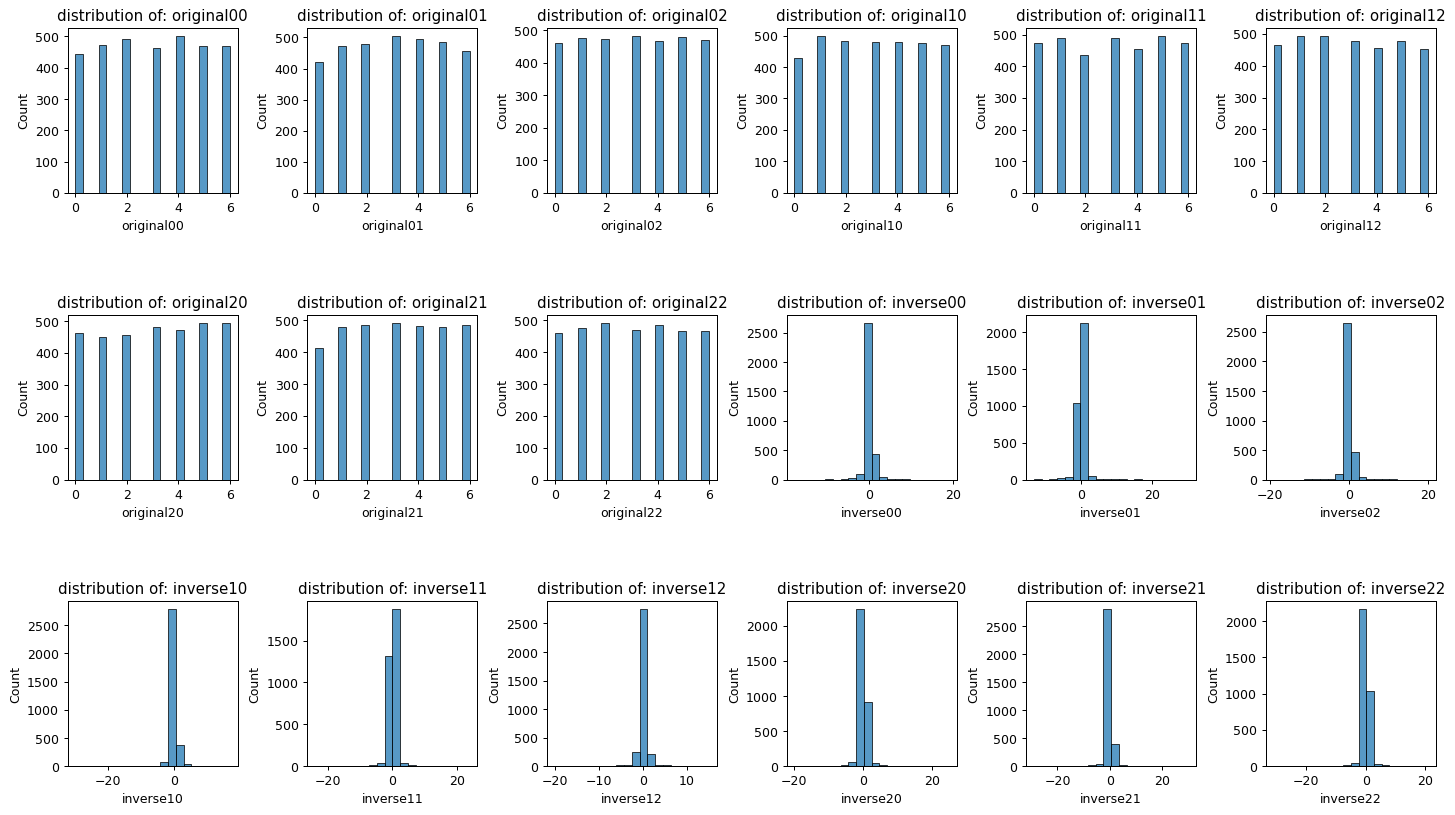

In [416]:
# let's check out the matrices cell values for inverse and randomly generated matrices

# use a 3x3 subplots layout, 16x9 aspect ratio
plt.subplots(3, 6, figsize=(16, 9), dpi=90)

# enumerate over column names
plot_df = df.copy()
plot_df.drop('original', axis=1, inplace=True)
plot_df.drop('inverse', axis=1, inplace=True)
for i, column in enumerate(plot_df.columns, 1):

    # select a specific subplot canvas
    plt.subplot(3, 6, i)

    # plot histogram
    sns.histplot(data=plot_df, x=column, bins=20)

    # customise layout - add title and remove top+right borders
    plt.title("distribution of: " + column)

# add padding between subplots
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

In [417]:
#Analysis

<b><font style='color:blue'>The originals look as expected, the inverses seem to be centerred around 0</font></b>

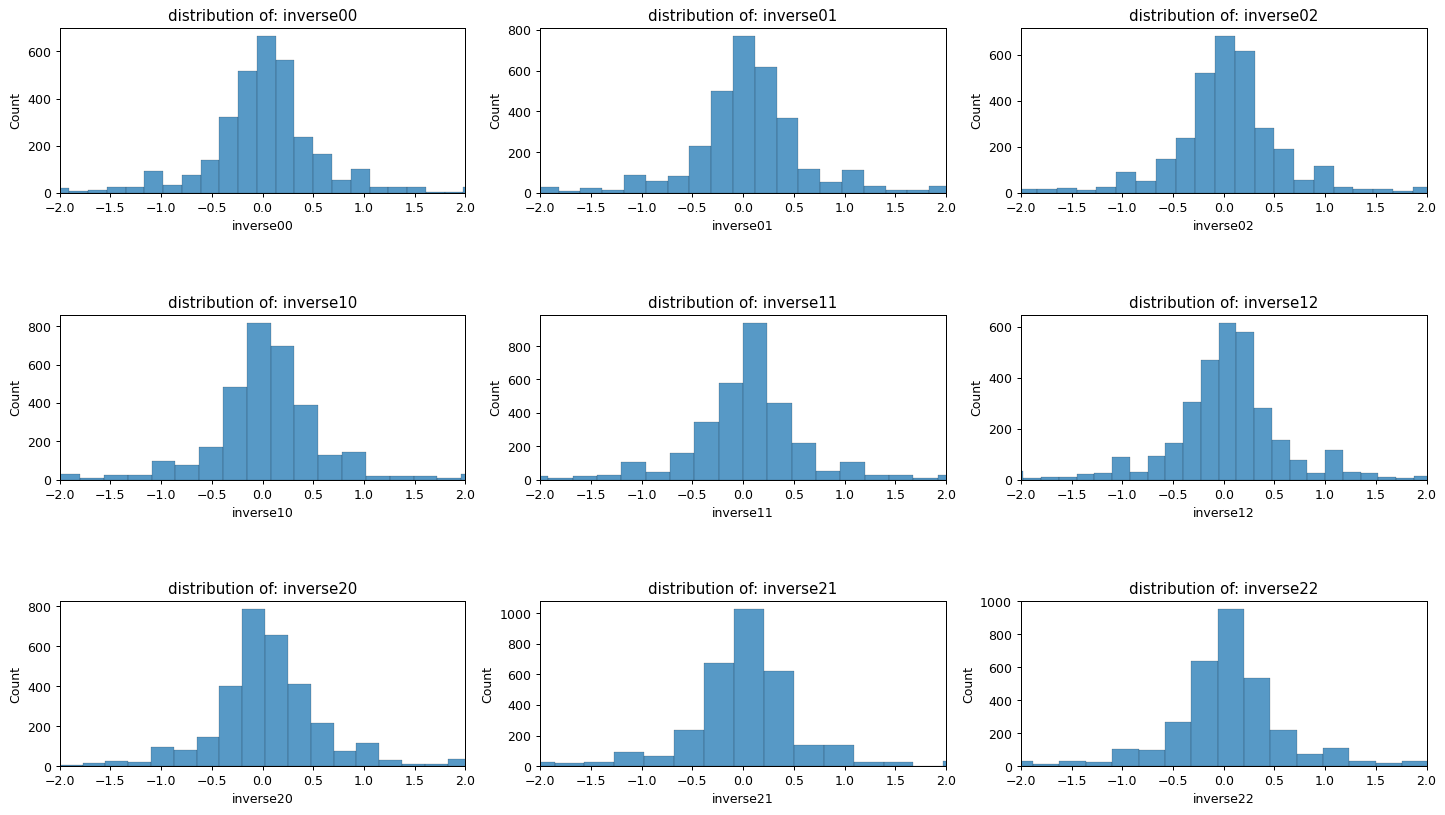

In [418]:
# let's look at the inverses in a narrower range
# use a 3x3 subplots layout, 16x9 aspect ratio
plt.subplots(3, 3, figsize=(16, 9), dpi=90)

# enumerate over column names
plot_df = plot_df.loc[:,~plot_df.columns.str.contains('original', case=True)] 

for i, column in enumerate(plot_df.columns, 1):

    # select a specific subplot canvas
    ax = plt.subplot(3, 3, i)

    # plot histogram
    sns.histplot(data=plot_df, x=column, bins=200)
    ax.set_xlim([-2,2])

    # customise layout - add title and remove top+right borders
    plt.title("distribution of: " + column)

# add padding between subplots
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)


In [419]:
#Analysis

<b><font style='color:blue'>Interesting how value tend to be normally distributed around 0 for all cells</font></b>

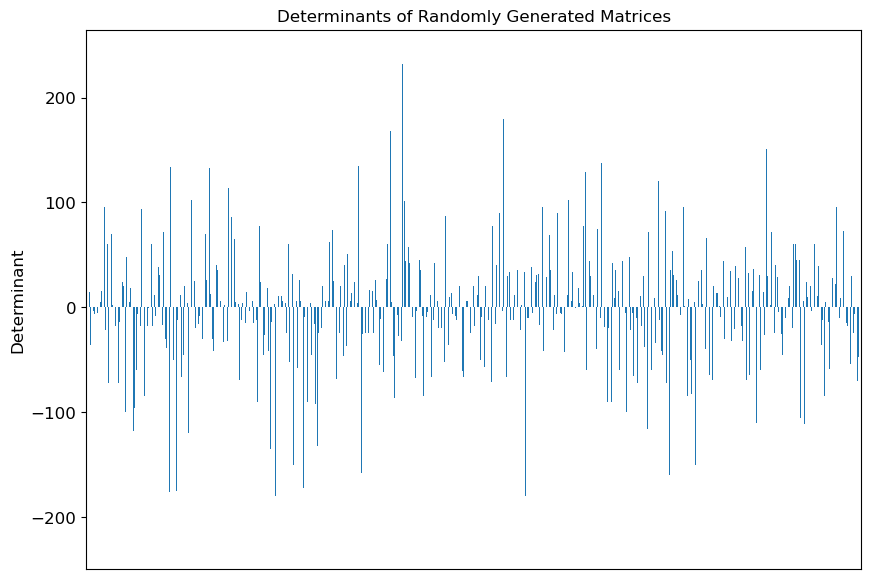

In [420]:
#make a histogram plat of determinants of randomly generated matrices
dets = df.apply(lambda row: np.linalg.det(row['original']), axis=1)
ax = dets.plot(kind='bar', title ="Determinants of Randomly Generated Matrices", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_ylabel("Determinant", fontsize=12)
ax.get_xaxis().set_visible(False)
plt.show()

<b><font style='color:blue'>I wont perform more analysis on determinants, it is good to see an estimate of the range and the frequency</font></b>

## Step 4: Single Cell Test 1 and Linear Regression Analysis

In [422]:
#Perform Linear Regression on a single cell - using the parameters of Test 1

dflm = df.copy()
y = dflm['inverse' + cellToPerformSingleCellLinearRegressionAnalysisOn]
dropCols(dflm)
X = dflm[dflm.columns]
X_withconstant = sm.add_constant(X)
lm_cell = sm.OLS(y,X_withconstant)
lm_cell_results = lm_cell.fit()
lm_cell_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inverse00   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.397
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           4.76e-09
Time:                        12:41:55   Log-Likelihood:                -5279.8
No. Observations:                3314   AIC:                         1.058e+04
Df Residuals:                    3304   BIC:                         1.064e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.100      0.164      0.870      -0.179       0.211
original00     0.0546      0.010      5.213      0.000       0.034       0.075
original01    -0.0202      0.011     -1.903      0.057      -0.041       0.001
original02    -0.0189      0.010     -1.820      0.069      -0.039       0.001
original10    -0.0328      0.010     -3.130      0.002      -0.053      -0.012
original11     0.0197      0.010      1.906      0.057      -0.001       0.040
original12    -0.0026      0.010     -0.245      0.806      -0.023       0.018
original20    -0.0196      0.010     -1.895      0.058      -0.040       0.001
original21    -0.0094      0.011     -0.897      0.370      -0.030       0.011
original22     0.0217      0.010      2.085      0.037       0.001       0.042
==============================================================================
Omnibus:                     1520.186   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           433738.146
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                      59.013   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [423]:
#print model parameters
lm_cell_results.params

const         0.016328
original00    0.054644
original01   -0.020156
original02   -0.018946
                ...   
original12   -0.002559
original20   -0.019601
original21   -0.009436
original22    0.021749
Length: 10, dtype: float64

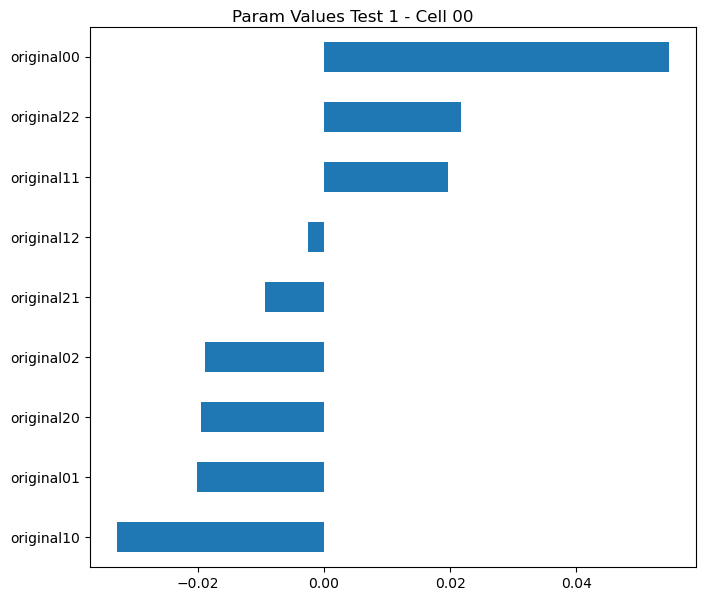

In [424]:
#plot of distribution of params
fig, ax = plt.subplots(1, 1, figsize=(7,6))
fig.suptitle('Param Values Test 1 - Cell '+cellToPerformSingleCellLinearRegressionAnalysisOn)
lm_cell_results.params[1:].sort_values().plot(kind="barh")
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

In [425]:
print("R Squared value for the regression is: " + str(lm_cell_results.rsquared))

R Squared value for the regression is: 0.01712615814045859


<b><font style='color:blue'>The Coefficients for regression can be seen above. The coefficients are reasonable considering the ranges for the regression, unfortunately the rsquared value is to low for a matching regression. This is as expected for the values of an inverse matrix as each inverse is quite different and there is clearly not a great linear regression for going directly from a matrix to its inverse.<br><br>R-squared (R2) is a statistical measure that represents the proportion of the variance for dependent variables that’s explained by an independent variable in a regression model. A higher R Squared means a better regression fit/model. Different applications have different requirements for R Squared value, a generally accepted metric is 0.2 <br><br>Different random seeds (different randomly generated original matrices) will produce different results but they tend to be around 0.015 <br><br>An automated analysis of different sets of randomly generated matrices will be performed in the next Notebook</font></b>

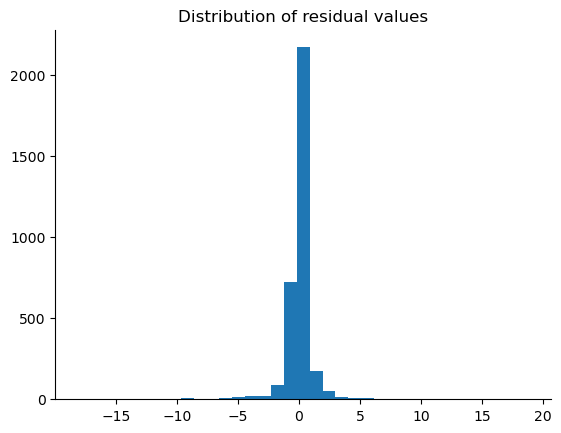

In [426]:
# Plotting the residuals of the model 3.1.2
plt.figure()
plt.hist(lm_cell_results.resid, bins = 35)
plt.title('Distribution of residual values')
sns.despine()
plt.show()

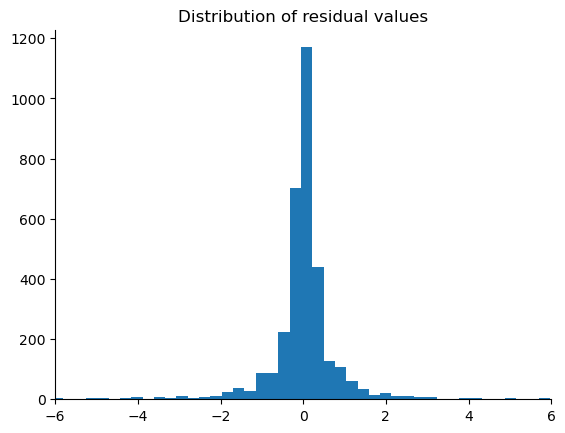

In [427]:
# Plotting the residuals of the model 3.1.2
plt.figure()
plt.hist(lm_cell_results.resid, bins = 135)
plt.title('Distribution of residual values')
sns.despine()
plt.xlim([-6,6])
plt.show()

<b><font style='color:blue'>The residual plot is normally distributed so the error is non random</font></b>

In [428]:
# calculating the shapiro test statisic and its p-value
print("Shapiro-Wilk Test: ", stats.shapiro(lm_cell_results.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.5989862680435181, pvalue=0.0)


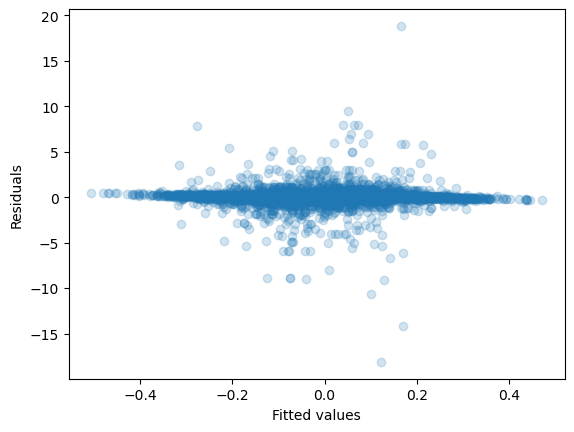

In [429]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(lm_cell_results.fittedvalues, lm_cell_results.resid, alpha=0.2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

<b><font style='color:blue'>This graph indicates that the p value cannot be trusted since the variance gets smaller as the fitted values increase so the regression is not reliable</font></b>

<b><font style='color:blue'>it would be better to do this for all random seeds/cells/tests but that would be overkill/too many plots</font></b>

<b><font style='color:blue'>further analysis will be of rsquared values accross all cells to investigate validity of linear regression for matrix inversion</font></b>

## Step 5: Test 1

In [430]:
#do a linear regression for each cell of the matrix inverse and show params to verify the regressions 
#a complete regression analysis for each cell is above, we are merely verifying that the regressions generated are reasonable
#and that there are no coding errors

test1fit = []
test1fitstderr = []
dflm = df.copy()

for i in listVar:
    for j in listVar:
        dflm = df.copy()
        y = dflm['inverse'+str(i)+str(j)]
        dropCols(dflm)
        X = dflm[dflm.columns]
        X_withconstant = sm.add_constant(X)
        lm = sm.OLS(y,X_withconstant)
        fit = lm.fit()
        print(fit.params)
        test1fit.append([ str(i)+" "+str(j),fit.rsquared])
        test1fitstderr.append([ str(i)+" "+str(j),fit.bse])
        

const         0.016328
original00    0.054644
original01   -0.020156
original02   -0.018946
                ...   
original12   -0.002559
original20   -0.019601
original21   -0.009436
original22    0.021749
Length: 10, dtype: float64
const         0.148677
original00   -0.011852
original01   -0.006427
original02    0.000063
                ...   
original12   -0.034277
original20   -0.026746
original21    0.029043
original22    0.000205
Length: 10, dtype: float64
const         0.082356
original00   -0.019282
original01    0.026977
original02    0.014135
                ...   
original12    0.014429
original20    0.043600
original21   -0.032281
original22   -0.036761
Length: 10, dtype: float64
const         0.124762
original00   -0.023316
original01    0.063027
original02   -0.034993
                ...   
original12   -0.000959
original20    0.016210
original21   -0.020707
original22   -0.004439
Length: 10, dtype: float64
const        -0.008612
original00   -0.021703
original01   -0.03

<b><font style='color:blue'>The params are near 0 and they are similar to the single cell analysis done above</font></b>

In [431]:
cellList = []  
test1fitlist = []
test1fitliststderr = []
for x in test1fit:
    cellList.append(x[0])
    test1fitlist.append(x[1])
    
for x in test1fitstderr:
    test1fitliststderr.append(x[1])
    
        
test1df = pd.DataFrame.from_dict({
    'Cell': cellList,
    'RSquaredFit': test1fitlist
})

test1dfstderr = pd.DataFrame.from_dict({
    'Cell': cellList,
    'StdErr': test1fitliststderr
})

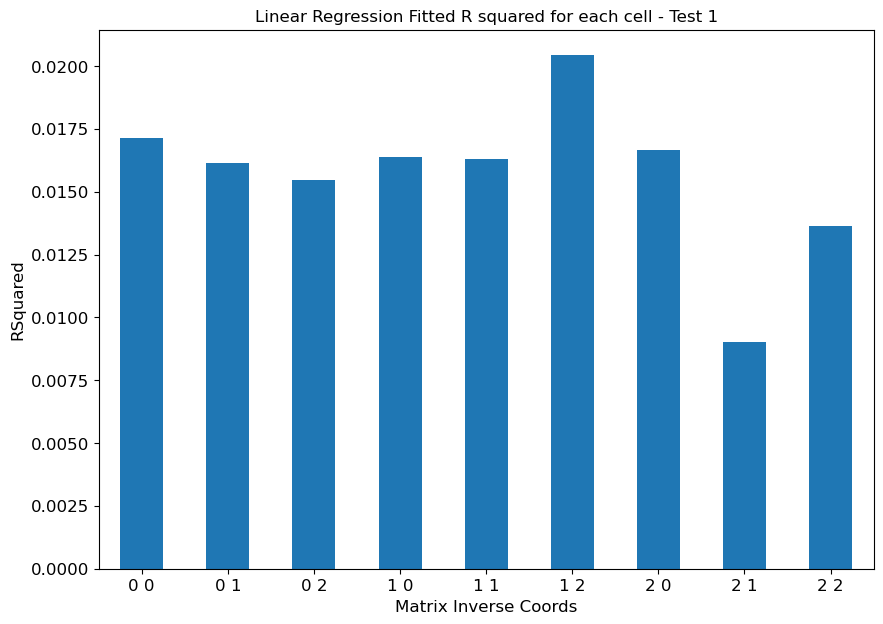

Generated RSquared values for Linear Regression each inverse element -> the mean of these values: 0.0157
Generated RSquared values for Linear Regression each inverse element -> the Standard Deviation of these values: 0.0031


In [432]:
#plot the rsquared values for each cell for the last linear regression, and display means and standard variations accross cells
ax = test1df.plot(kind='bar', title ="Linear Regression Fitted R squared for each cell - Test 1", x="Cell", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

Test1mean = pd.DataFrame(test1fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()
Test1std = pd.DataFrame(test1fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].std() 

print('Generated RSquared values for Linear Regression each inverse element -> the mean of these values: ' + str(np.round(Test1mean,digitsToRoundResults)))
print('Generated RSquared values for Linear Regression each inverse element -> the Standard Deviation of these values: ' + str(np.round(Test1std,digitsToRoundResults)))

<b><font style='color:blue'>R-squared (R2) is a statistical measure that represents the proportion of the variance for dependent variables that’s explained by an independent variable in a regression model. A higher R Squared means a better regression fit/model. Different applications have different requirements for R Squared value, a generally accepted metric is 0.2</font></b>

<b><font style='color:blue'>This graph shows how the r squared values vary by cell</font></b>

## Step 6: Test 2

In [433]:
# Test 2 - linear regression with test 1 and all possible combinations of one matrix element multiplied by every other 
# matrix element

dflm = df.copy()

for i in listVar:
    for j in listVar:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
dflm = dflm.drop('original00x00', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
dflm = dflm.drop('original01x01', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
dflm = dflm.drop('original02x02', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
dflm = dflm.drop('original10x10', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
dflm = dflm.drop('original11x11', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
dflm = dflm.drop('original12x12', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
dflm = dflm.drop('original20x20', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
dflm = dflm.drop('original21x21', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
dflm = dflm.drop('original22x22', axis=1)
  

In [434]:
dflm.describe()

,original00,original01,original02,original10,original11,original12,original20,original21,original22,inverse00,...,original21x20,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.00000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,...,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000
mean,3.026554,3.047073,3.009053,3.020821,3.01026,2.968316,3.061557,3.063669,2.996681,-0.008053,...,9.258298,9.151177,9.151177,9.185576,8.905552,8.992758,9.043452,8.977067,9.245323,9.151177
std,1.980105,1.957028,1.993479,1.977504,2.00991,1.986650,2.004782,1.970624,1.987659,1.200849,...,9.424985,9.319678,9.431041,9.391361,9.266772,9.207109,9.430729,9.393248,9.541837,9.319678
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-0.250000,...,0.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,0.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,0.272727,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
max,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,19.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000


In [435]:
dflm.columns

Index(['original', 'inverse', 'original00', 'original01', 'original02',
       'original10', 'original11', 'original12', 'original20', 'original21',
       'original22', 'inverse00', 'inverse01', 'inverse02', 'inverse10',
       'inverse11', 'inverse12', 'inverse20', 'inverse21', 'inverse22',
       'original00x01', 'original00x02', 'original00x10', 'original00x11',
       'original00x12', 'original00x20', 'original00x21', 'original00x22',
       'original01x00', 'original01x02', 'original01x10', 'original01x11',
       'original01x12', 'original01x20', 'original01x21', 'original01x22',
       'original02x00', 'original02x01', 'original02x10', 'original02x11',
       'original02x12', 'original02x20', 'original02x21', 'original02x22',
       'original10x00', 'original10x01', 'original10x02', 'original10x11',
       'original10x12', 'original10x20', 'original10x21', 'original10x22',
       'original11x00', 'original11x01', 'original11x02', 'original11x10',
       'original11x12', 'origin

<b><font style='color:blue'>The generated data is correct and matches the parameters for test2</font></b>

In [436]:
#Test 2 regressions - and print params to verify regressions

test2fit = []

for i in listVar:
    for j in listVar:
        dfl = dflm.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dropCols(dfl)
        X = dfl[dfl.columns]
        X_withconstant = sm.add_constant(X)
        lm = sm.OLS(y,X_withconstant)
        fit2 = lm.fit()
        if i==0 and j==0:
            pd.set_option('display.max_rows', 999)
            print(fit2.params)
        else:
            pd.set_option('display.max_rows', 9)
            print(fit2.params)
        test2fit.append([ str(i)+" "+str(j),fit2.rsquared])

const           -0.186927
original00       0.086859
original01      -0.010567
original02       0.008333
original10       0.040850
original11       0.009488
original12      -0.034735
original20      -0.001137
original21       0.026134
original22      -0.000911
original00x01   -0.003366
original00x02   -0.002552
original00x10   -0.006011
original00x11   -0.000432
original00x12    0.002334
original00x20    0.000392
original00x21    0.002434
original00x22    0.001899
original01x00   -0.003366
original01x02    0.003547
original01x10   -0.000452
original01x11   -0.002244
original01x12    0.006145
original01x20   -0.000905
original01x21   -0.001371
original01x22   -0.002840
original02x00   -0.002552
original02x01    0.003547
original02x10   -0.003033
original02x11    0.003665
original02x12   -0.000781
original02x20   -0.001708
original02x21   -0.003159
original02x22   -0.000759
original10x00   -0.006011
original10x01   -0.000452
original10x02   -0.003033
original10x11   -0.006673
original10x1

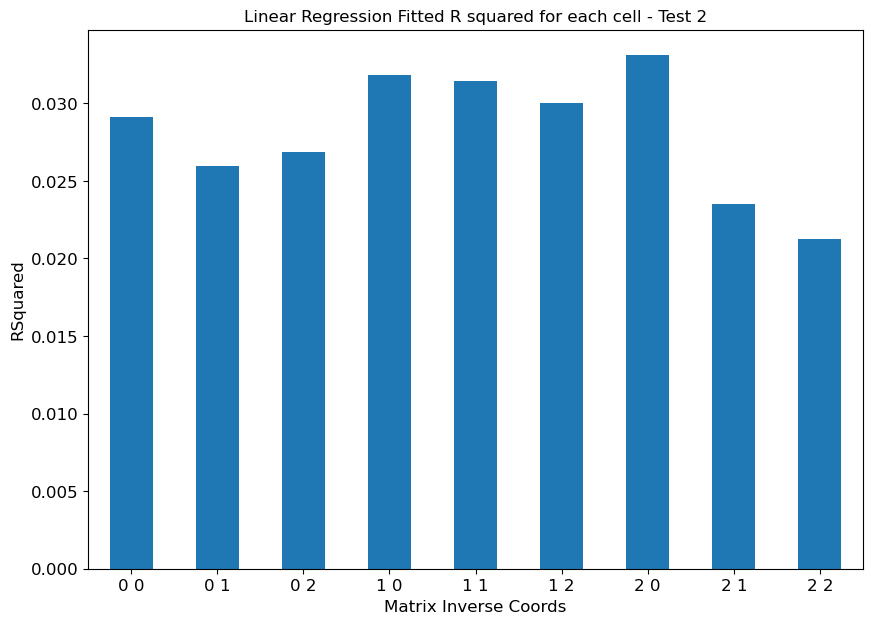

Generated RSquared values for Linear Regression each inverse element -> the mean of these values: 0.0281
Generated RSquared values for Linear Regression each inverse element -> the Standard Deviation of these values: 0.004


In [437]:
#plot the r squared values
cellList = []  
test2fitlist = []
for x in test2fit:
    cellList.append(x[0])
    test2fitlist.append(x[1])
        
test2df = pd.DataFrame.from_dict({
    'Cell': cellList,
    'RSquaredFit': test2fitlist
})

ax = test2df.plot(kind='bar', title ="Linear Regression Fitted R squared for each cell - Test 2", x="Cell", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

Test2mean = pd.DataFrame(test2fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()
Test2std = pd.DataFrame(test2fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].std() 

print('Generated RSquared values for Linear Regression each inverse element -> the mean of these values: ' + str(np.round(Test2mean,digitsToRoundResults)))
print('Generated RSquared values for Linear Regression each inverse element -> the Standard Deviation of these values: ' + str(np.round(Test2std,digitsToRoundResults)))

In [438]:
#Analysis

<b><font style='color:blue'>Test 2 does not produce a sufficient rsquared value for a linear regression - However almost a double in r squared values from Test 1. Different sets of matrices produce different results but generally the mean is about 0.025<br><br>The mean for Test 1 was about 0.015

## Step 7: Test 3

In [439]:
#Test 3 - linear regression with test 2 and the square of each matrix element - the code is very similar to test 2 code
#without the sqaured terms being removed

dflm = df.copy()

for i in listVar:
    for j in listVar:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

for i in listVar:
    for j in listVar:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
  

In [440]:
dflm.describe()

,original00,original01,original02,original10,original11,original12,original20,original21,original22,inverse00,...,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21,original22x22
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.00000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,...,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000
mean,3.026554,3.047073,3.009053,3.020821,3.01026,2.968316,3.061557,3.063669,2.996681,-0.008053,...,9.151177,9.151177,9.185576,8.905552,8.992758,9.043452,8.977067,9.245323,9.151177,12.929692
std,1.980105,1.957028,1.993479,1.977504,2.00991,1.986650,2.004782,1.970624,1.987659,1.200849,...,9.319678,9.431041,9.391361,9.266772,9.207109,9.430729,9.393248,9.541837,9.319678,12.432597
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-0.250000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,0.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,9.000000
75%,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,0.272727,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,25.000000
max,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,19.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000


In [441]:
dflm.columns

Index(['original', 'inverse', 'original00', 'original01', 'original02',
       'original10', 'original11', 'original12', 'original20', 'original21',
       ...
       'original21x22', 'original22x00', 'original22x01', 'original22x02',
       'original22x10', 'original22x11', 'original22x12', 'original22x20',
       'original22x21', 'original22x22'],
      dtype='object', length=101)

In [442]:
test3fit = []

dflm3 = dflm.copy()

for i in listVar:
    for j in listVar:
        dfl = dflm3.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dropCols(dfl)
        X = dfl[dfl.columns]
        X_withconstant = sm.add_constant(X)
        lm = sm.OLS(y,X_withconstant)
        fit3 = lm.fit()
        if i==0 and j==0:
            pd.set_option('display.max_rows', 999)
            print(fit3.params)
        else:
            pd.set_option('display.max_rows', 9)
            print(fit3.params)
        test3fit.append([ str(i)+" "+str(j),fit3.rsquared])

const           -0.152857
original00       0.176443
original01       0.034731
original02      -0.029421
original10       0.044942
original11      -0.052479
original12      -0.010493
original20      -0.008200
original21      -0.020598
original22      -0.047718
original00x00   -0.015172
original00x01   -0.003374
original00x02   -0.002805
original00x10   -0.006067
original00x11   -0.000546
original00x12    0.002497
original00x20    0.000948
original00x21    0.002555
original00x22    0.001917
original01x00   -0.003374
original01x01   -0.007034
original01x02    0.003536
original01x10   -0.000461
original01x11   -0.002626
original01x12    0.005892
original01x20   -0.000635
original01x21   -0.001650
original01x22   -0.002768
original02x00   -0.002805
original02x01    0.003536
original02x02    0.006131
original02x10   -0.003065
original02x11    0.003725
original02x12   -0.000617
original02x20   -0.001627
original02x21   -0.003275
original02x22   -0.000515
original10x00   -0.006067
original10x0

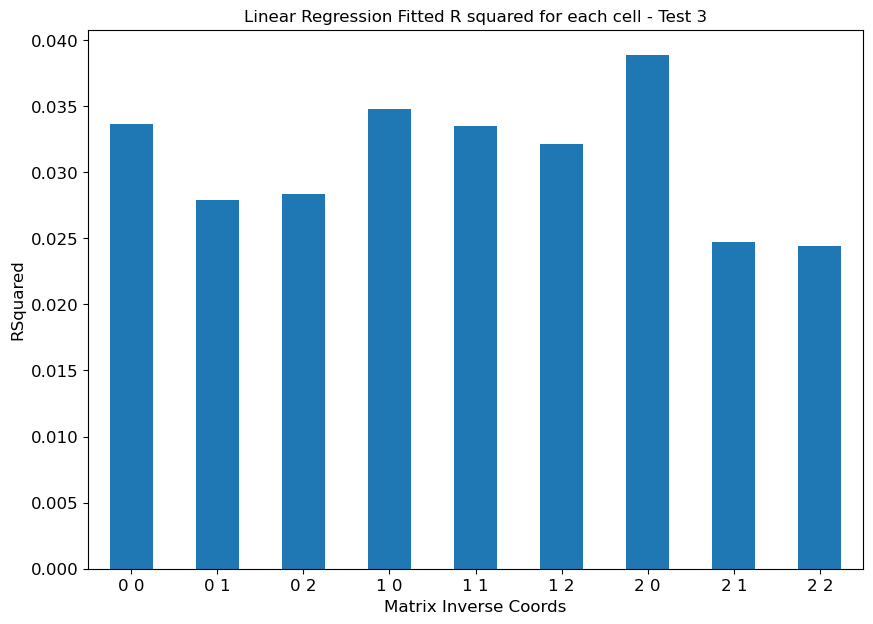

Generated RSquared values for Linear Regression each inverse element -> the mean of these values: 0.0309
Generated RSquared values for Linear Regression each inverse element -> the Standard Deviation of these values: 0.0049


In [443]:
cellList = []  
test3fitlist = []
for x in test3fit:
    cellList.append(x[0])
    test3fitlist.append(x[1])
        
test3df = pd.DataFrame.from_dict({
    'Cell': cellList,
    'RSquaredFit': test3fitlist
})

ax = test3df.plot(kind='bar', title ="Linear Regression Fitted R squared for each cell - Test 3", x="Cell", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

Test3mean = pd.DataFrame(test3fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()
Test3std = pd.DataFrame(test3fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].std() 

print('Generated RSquared values for Linear Regression each inverse element -> the mean of these values: ' + str(np.round(Test3mean,digitsToRoundResults)))
print('Generated RSquared values for Linear Regression each inverse element -> the Standard Deviation of these values: ' + str(np.round(Test3std,digitsToRoundResults)))

In [444]:
#Analysis

<b><font style='color:blue'>Test 3 does not produce a sufficient rsquared value for a linear regression - However a better R squared average then test 2. Different sets of matrices produce different results but generally the mean is about 0.028<br><br>The mean for Test 2 is around 0.025

## Step 8: Test 4

In [445]:
# Test 4
dflm = df.copy()

for i in listVar:
    for j in listVar:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in listVar:
    for j in listVar:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0] * row['original'][0][0] , axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1] * row['original'][0][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2] * row['original'][0][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0] * row['original'][1][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1] * row['original'][1][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2] * row['original'][1][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0] * row['original'][2][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1] * row['original'][2][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2] * row['original'][1][2], axis=1)
  

In [446]:
test4fit = []

dflm4 = dflm.copy()

for i in listVar:
    for j in listVar:
        dfl = dflm4.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dropCols(dfl)
        X = dfl[dfl.columns]
        X_withconstant = sm.add_constant(X)
        lm = sm.OLS(y,X_withconstant)
        fit4 = lm.fit()
        if i==0 and j==0:
            pd.set_option('display.max_rows', 999)
            print(fit4.params)
        else:
            pd.set_option('display.max_rows', 9)
            print(fit4.params)
        test4fit.append([ str(i)+" "+str(j),fit4.rsquared])

const           -0.025620
original00       0.249811
original01      -0.021505
original02      -0.057232
original10      -0.065091
original11       0.057671
original12      -0.045049
original20      -0.046712
original21      -0.061377
original22       0.003585
original00x00   -0.008148
original00x01    0.003399
original00x02    0.006332
original00x10    0.003658
original00x11   -0.002183
original00x12    0.004095
original00x20    0.004763
original00x21    0.000476
original00x22   -0.000276
original01x00   -0.004456
original01x01    0.000664
original01x02    0.001345
original01x10   -0.000611
original01x11   -0.000756
original01x12   -0.000938
original01x20    0.000553
original01x21    0.000087
original01x22   -0.000153
original02x00   -0.006919
original02x01   -0.000041
original02x02    0.001980
original02x10    0.000122
original02x11   -0.003518
original02x12    0.003904
original02x20    0.001026
original02x21    0.003012
original02x22   -0.001062
original10x00   -0.005501
original10x0

In [447]:
#ANALYSIS

<b><font style='color:blue'>We can see that the original matrix cells have coefficients that are all shifted by one decimal place for most sets of matrices. So the result is that the orginal cell values are most important. The next graph will tell us if the r squared values are better for test 4</font></b>

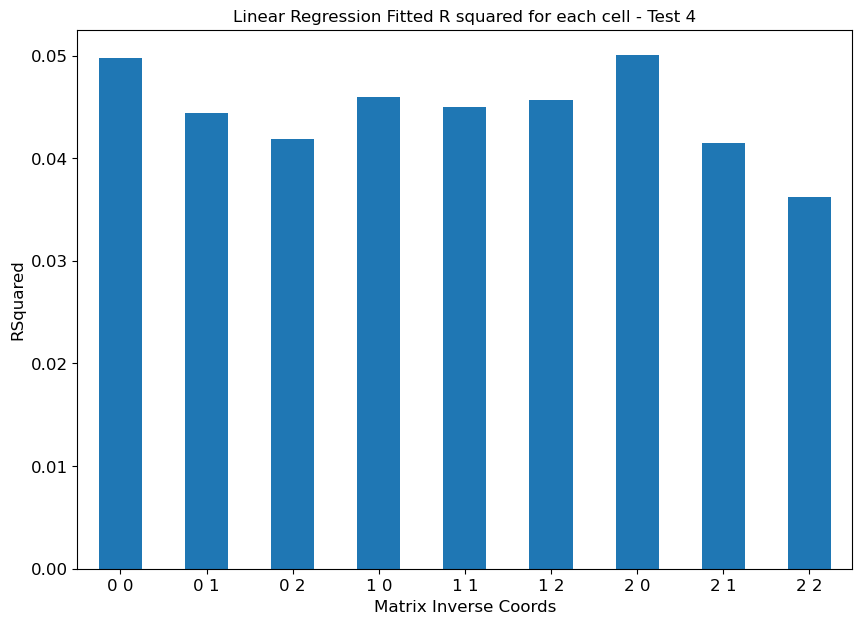

Generated RSquared values for Linear Regression each inverse element -> the mean of these values: 0.0445
Generated RSquared values for Linear Regression each inverse element -> the Standard Deviation of these values: 0.0043


In [448]:
cellList = []  
test4fitlist = []
for x in test4fit:
    cellList.append(x[0])
    test4fitlist.append(x[1])
        
test4df = pd.DataFrame.from_dict({
    'Cell': cellList,
    'RSquaredFit': test4fitlist
})
ax = test4df.plot(kind='bar', title ="Linear Regression Fitted R squared for each cell - Test 4", x="Cell", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

Test4mean = pd.DataFrame(test4fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()
Test4std = pd.DataFrame(test4fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].std() 

print('Generated RSquared values for Linear Regression each inverse element -> the mean of these values: ' + str(np.round(Test4mean,digitsToRoundResults)))
print('Generated RSquared values for Linear Regression each inverse element -> the Standard Deviation of these values: ' + str(np.round(Test4std,digitsToRoundResults)))

In [449]:
#ANALYSIS

<b><font style='color:blue'>Test 4 does not produce a sufficient rsquared value for a linear regression - However a better R squared average then test 2. Different sets of matrices produce different results but generally the mean is about 0.042<br><br>The mean for Test 3 is around 0.028</font></b>

## Step 9: Conclusion

In [450]:
#RESULTS SUMMARY FROM TEST 1, TEST 2, TEST 3, and TEST 4

In [451]:
#Show How R Squared varies by cell for each Test

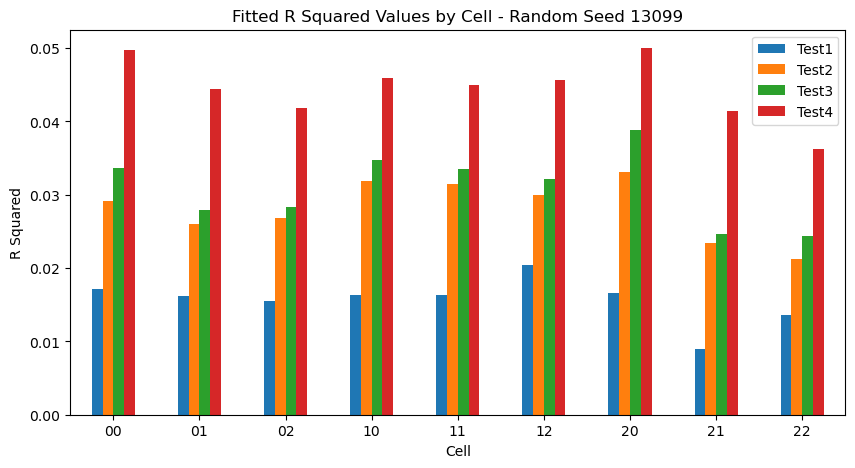

In [452]:
results_df2 = pd.DataFrame.from_dict({
    'Cell': ['00', '01', '02', '10', '11', '12', '20', '21', '22'],
    'Test1': [test1fit[0][1],test1fit[1][1], test1fit[2][1], test1fit[3][1],test1fit[4][1],test1fit[5][1],test1fit[6][1],test1fit[7][1],test1fit[8][1]],
    'Test2': [test2fit[0][1],test2fit[1][1], test2fit[2][1], test2fit[3][1],test2fit[4][1],test2fit[5][1],test2fit[6][1],test2fit[7][1],test2fit[8][1]],
    'Test3': [test3fit[0][1],test3fit[1][1], test3fit[2][1], test3fit[3][1],test3fit[4][1],test3fit[5][1],test3fit[6][1],test3fit[7][1],test3fit[8][1]],
    'Test4': [test4fit[0][1],test4fit[1][1], test4fit[2][1], test4fit[3][1],test4fit[4][1],test4fit[5][1],test4fit[6][1],test4fit[7][1],test4fit[8][1]],
})
results_df2.plot(kind='bar' , x='Cell',ylabel='R Squared', title='Fitted R Squared Values by Cell - Random Seed '+str(randomSeed), figsize=(10,5), rot=0);

We can see a general pattern accross each cell across tests, a cell r squared value relates to other cells in the same way for each test. 

This pattern exists generally for different random seeds

In [453]:
#Show the mean of the test group for all cells for each test

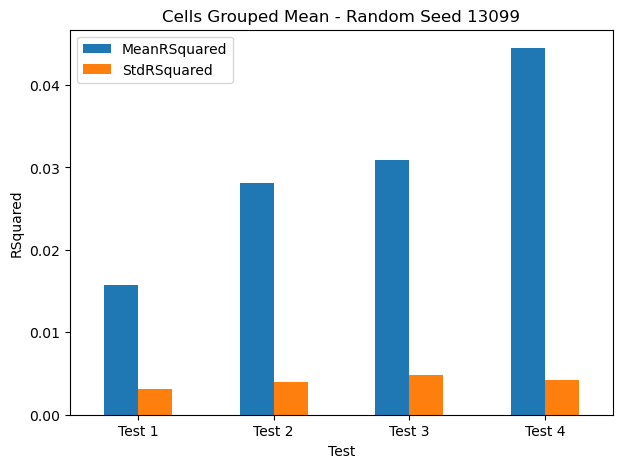

In [454]:
results_df = pd.DataFrame.from_dict({
    'Test': ['Test 1', 'Test 2', 'Test 3', 'Test 4'],
    'MeanRSquared': [Test1mean, Test2mean, Test3mean, Test4mean],
    'StdRSquared': [Test1std, Test2std, Test3std, Test4std]
})
results_df.plot(kind='bar' , x='Test', ylabel='RSquared', title='Cells Grouped Mean - Random Seed '+str(randomSeed), figsize=(7,5), rot=0);

<b><font style='color:blue'>Regardless of the random seed we always see a nice increase in the RSquared Value indicating that the fourth test has the best parameters for a linear regression. The Standard Deviation always increases or remains constant accross all cells</font></b>

<b><font style='color:blue'>The Test4 parameters are: linear regression with each matrix element and all possible combinations of one matrix element squared and multiplied by every other matrix element and the cube of each matrix element</font></b>

<b><font style='color:red'>Please see the github file 3x3TestResults.pdf with graphs of the results from this notebook running with various random seeds</font></b>